# Exploratory Data Analysis
This notebook handles:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Target Variable Analysis

In [1]:
import pandas as pd

df = pd.read_csv("../data/ENGINEERED_Melbourne_Housing_Market.csv")
df["SaleDate"] = pd.to_datetime(df["SaleDate"])
df.head()

,SaleDate,CouncilArea,RealEstateAgent,RegionName,SaleMethod,StreetName,StreetType,Suburb,UnitType,AvgRoomSize,...,DistanceToCBD,LandSize,Latitude,Longitude,NeighbouringProperties,Postcode,PropertyAge,Rooms,YearBuilt,Price
0,2016-03-12,Yarra_City,Biggin,Northern_Metropolitan,Sold,Turner,Street,Abbotsford,House,66.500000,...,2.5,202.0,-37.7996,144.9984,4019.0,3067.0,46.0,2.0,1970.0,1480000.0
1,2016-04-02,Yarra_City,Biggin,Northern_Metropolitan,Sold,Bloomburg,Street,Abbotsford,House,39.500000,...,2.5,156.0,-37.8079,144.9934,4019.0,3067.0,116.0,2.0,1900.0,1035000.0
2,2017-04-03,Yarra_City,Biggin,Northern_Metropolitan,Sold_Prior,Charles,Street,Abbotsford,House,50.000000,...,2.5,134.0,-37.8093,144.9944,4019.0,3067.0,117.0,3.0,1900.0,1465000.0
3,2017-04-03,Yarra_City,Biggin,Northern_Metropolitan,Passed_In,Federation,Lane,Abbotsford,House,44.333333,...,2.5,94.0,-37.7969,144.9969,4019.0,3067.0,47.0,3.0,1970.0,850000.0
4,2016-04-06,Yarra_City,Nelson,Northern_Metropolitan,Vendor_Bid,Park,Street,Abbotsford,House,35.500000,...,2.5,120.0,-37.8072,144.9941,4019.0,3067.0,2.0,4.0,2014.0,1600000.0


In [2]:
from data_manipulation import exploratory_data_analysis as eda
from data_manipulation.feature_engineering import remove_column
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SaleDate                27247 non-null  datetime64[ns]
 1   CouncilArea             27247 non-null  object        
 2   RealEstateAgent         27247 non-null  object        
 3   RegionName              27247 non-null  object        
 4   SaleMethod              27247 non-null  object        
 5   StreetName              27247 non-null  object        
 6   StreetType              27247 non-null  object        
 7   Suburb                  27247 non-null  object        
 8   UnitType                27247 non-null  object        
 9   AvgRoomSize             27247 non-null  float64       
 10  Bathrooms               27247 non-null  float64       
 11  Bedrooms                27247 non-null  float64       
 12  BuildingArea            27247 non-null  float6

## Univariate Analysis

### Features Descriptions

In [4]:
df_description = eda.get_custom_description(df)
df_description

,SaleDate,CouncilArea,RealEstateAgent,RegionName,SaleMethod,StreetName,StreetType,Suburb,UnitType,AvgRoomSize,...,DistanceToCBD,LandSize,Latitude,Longitude,NeighbouringProperties,Postcode,PropertyAge,Rooms,YearBuilt,Price
Cardinality,NaN,33.0,345.0,8.0,5.0,6724.0,83.0,343.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Majority,NaN,Boroondara_City,Nelson,Southern_Metropolitan,Sold,The,Street,Reservoir,House,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MajorityPercentage,NaN,0.09,0.1,0.31,0.64,0.01,0.49,0.03,0.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min,2016-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,-38.19,144.42,83.0,3000.0,-2.0,1.0,1196.0,85000.0
Max,2018-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8903.0,...,48.1,433014.0,-37.4,145.53,21650.0,3978.0,821.0,16.0,2019.0,11200000.0
Range,979 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8903.0,...,48.1,433014.0,0.79,1.1,21567.0,978.0,823.0,15.0,823.0,11115000.0
Skewness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.04,...,1.48,111.33,-0.42,-0.44,1.02,3.98,2.19,0.51,-2.19,2.59
IQR,378 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.33,...,7.6,241.0,0.08,0.09,6118.0,107.0,2.0,2.0,0.0,660000.0
IQROutliers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1127.0,...,1188.0,992.0,1723.0,2210.0,727.0,794.0,10592.0,23.0,10890.0,1278.0
Kurtosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16411.85,...,3.48,15040.91,2.72,2.79,0.92,21.95,38.8,2.81,38.55,13.1


### Feature Editing

Removing these features do to high cardinality

In [5]:
df = remove_column(df, "StreetName")

Removing these features do to having a dominant category


In [6]:
df = remove_column(df, "SaleMethod")
df = remove_column(df, "StreetType")
df = remove_column(df, "UnitType")

Top N Cardinality Reduction

In [7]:
df = eda.top_n_filter(df, "RealEstateAgent", 32)
df = eda.top_n_filter(df, "Suburb", 32)

Removing Z-Score outliers instead of IQR outliers since some of the outliers are actually meaningful and to not reduce the model"s cardinality too much since the IQR is low

In [8]:
df = eda.remove_outliers(df, "zscore")

### Univariate Plots

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22502 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SaleDate                22502 non-null  datetime64[ns]
 1   CouncilArea             22502 non-null  object        
 2   RealEstateAgent         22502 non-null  object        
 3   RegionName              22502 non-null  object        
 4   Suburb                  22502 non-null  object        
 5   AvgRoomSize             22502 non-null  float64       
 6   Bathrooms               22502 non-null  float64       
 7   Bedrooms                22502 non-null  float64       
 8   BuildingArea            22502 non-null  float64       
 9   BuildingToLandRatio     22502 non-null  float64       
 10  CarSpots                22502 non-null  float64       
 11  DistanceToCBD           22502 non-null  float64       
 12  LandSize                22502 non-null  float64    

In [10]:
eda.get_custom_description(df)

,SaleDate,CouncilArea,RealEstateAgent,RegionName,Suburb,AvgRoomSize,Bathrooms,Bedrooms,BuildingArea,BuildingToLandRatio,...,DistanceToCBD,LandSize,Latitude,Longitude,NeighbouringProperties,Postcode,PropertyAge,Rooms,YearBuilt,Price
Cardinality,NaN,28.0,33.0,8.0,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Majority,NaN,Boroondara_City,Other,Southern_Metropolitan,Other,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MajorityPercentage,NaN,0.09,0.16,0.33,0.64,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min,2016-01-28 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-38.02,144.71,389.0,3000.0,-2.0,1.0,1906.0,85000.0
Max,2018-10-03 00:00:00,NaN,NaN,NaN,NaN,207.0,3.0,5.0,286.0,3.59,...,31.2,8970.0,-37.59,145.29,17496.0,3338.0,111.0,5.0,2019.0,2770000.0
Range,979 days 00:00:00,NaN,NaN,NaN,NaN,207.0,3.0,4.0,286.0,3.59,...,31.2,8970.0,0.43,0.58,17107.0,338.0,113.0,4.0,113.0,2685000.0
Skewness,NaN,NaN,NaN,NaN,NaN,2.29,1.16,-0.04,0.67,2.21,...,0.59,8.32,-0.25,-0.01,0.59,0.25,0.33,0.05,-0.34,1.08
IQR,378 days 00:00:00,NaN,NaN,NaN,NaN,24.0,1.0,0.0,0.0,0.18,...,7.4,236.75,0.07,0.09,5096.0,105.0,2.0,1.0,0.0,609000.0
IQROutliers,NaN,NaN,NaN,NaN,NaN,901.0,0.0,8880.0,7806.0,3386.0,...,173.0,712.0,1050.0,1506.0,149.0,19.0,7808.0,722.0,8045.0,656.0
Kurtosis,NaN,NaN,NaN,NaN,NaN,7.42,0.42,0.91,5.39,7.15,...,0.17,114.89,0.56,1.03,-0.35,-1.1,2.27,-0.2,2.28,0.97


#### Numerical Features

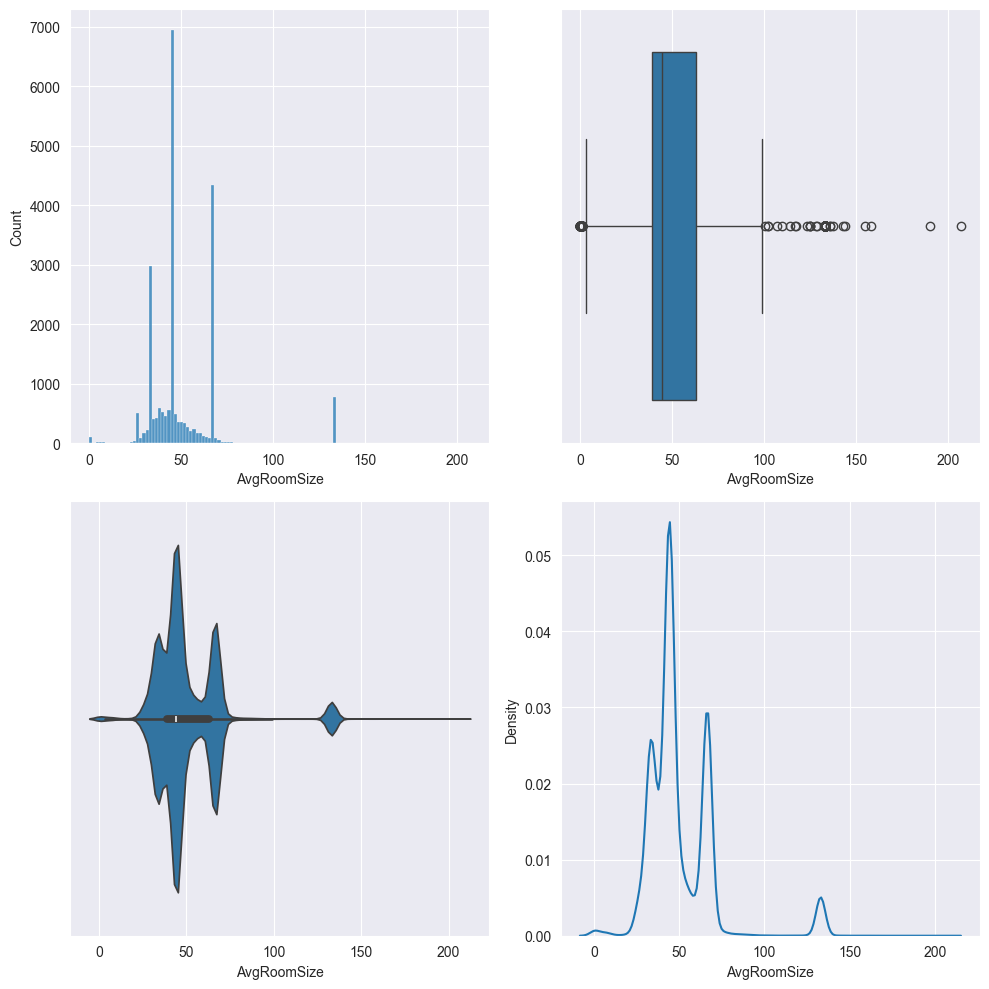

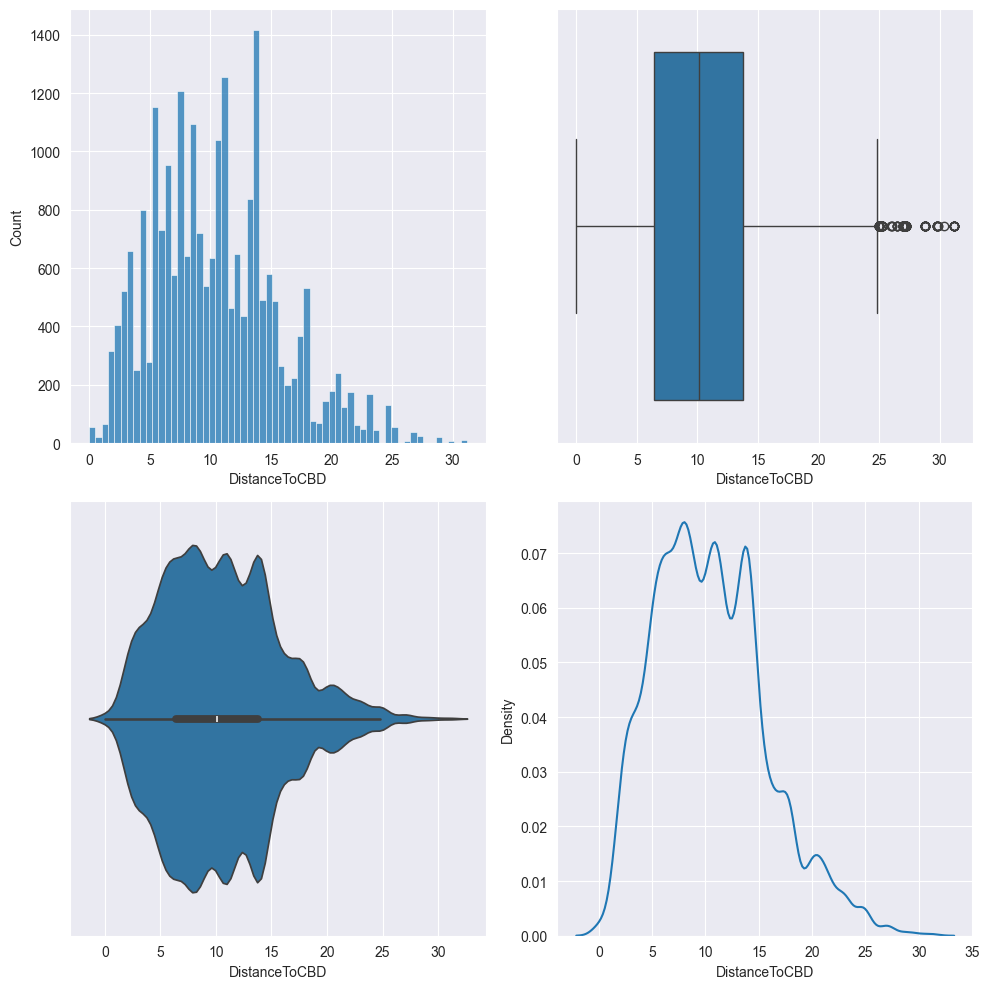

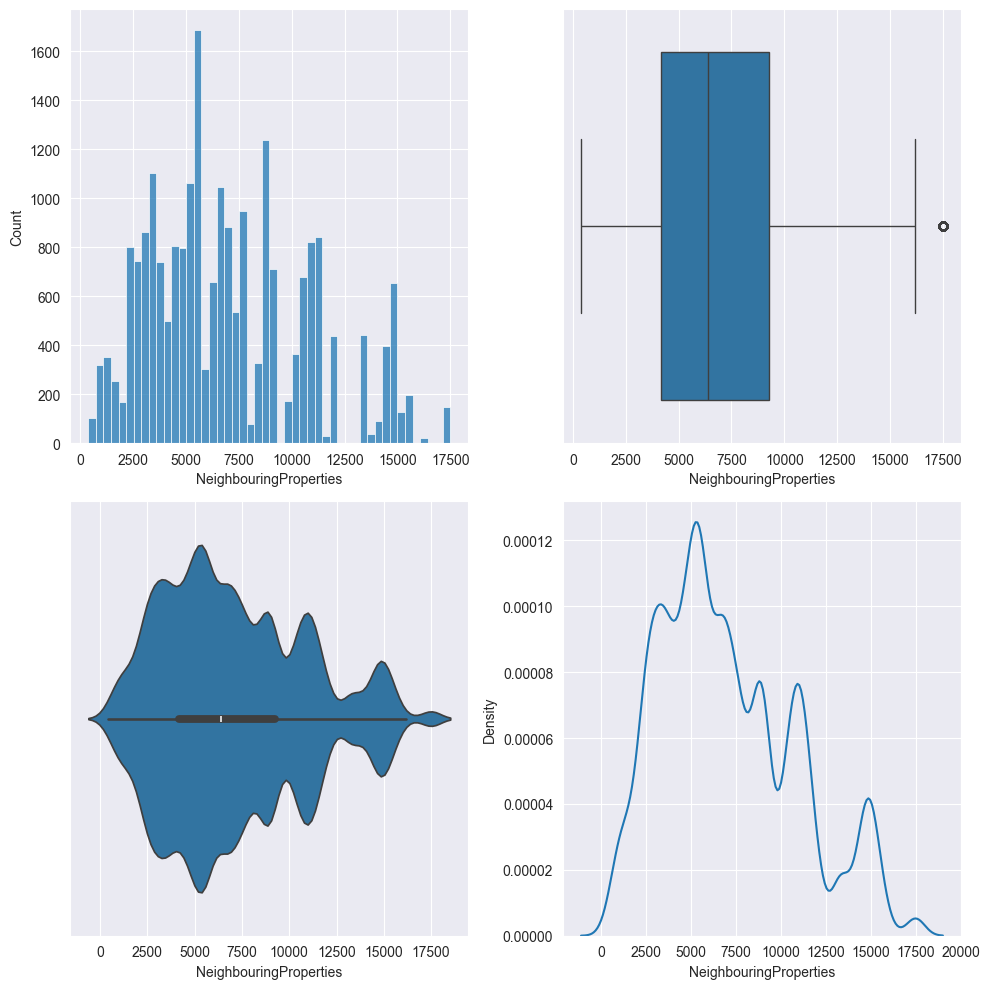

In [11]:
for column in ["AvgRoomSize", "DistanceToCBD", "NeighbouringProperties"]:
    eda.plot_univariates(sns.histplot, sns.boxplot, sns.violinplot, sns.kdeplot, data=df, x=column)

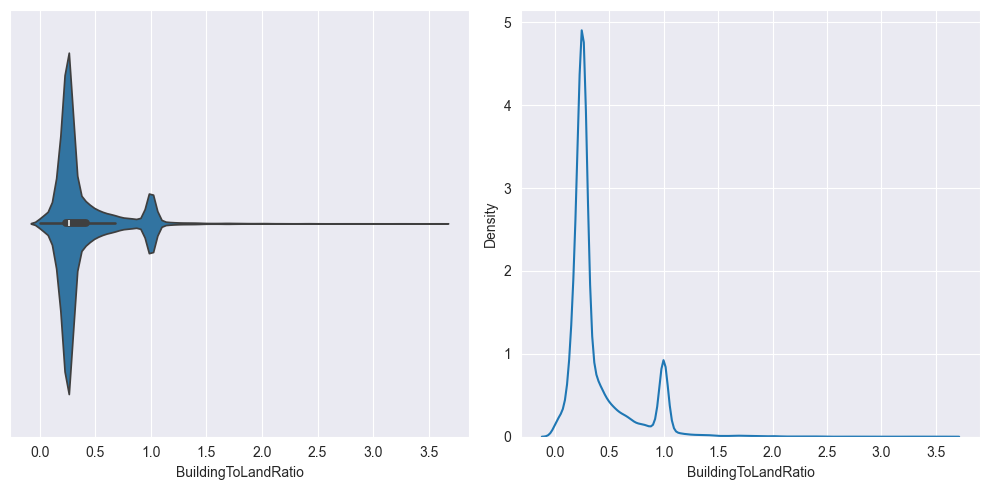

In [12]:
eda.plot_univariates(sns.violinplot, sns.kdeplot, data=df, x="BuildingToLandRatio")

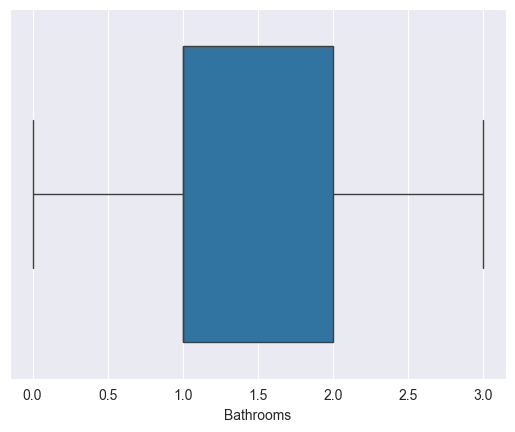

In [13]:
sns.boxplot(data=df, x="Bathrooms")
plt.show()

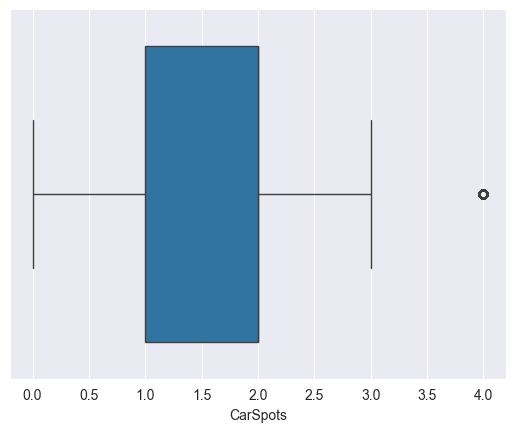

In [14]:
sns.boxplot(data=df, x="CarSpots")
plt.show()

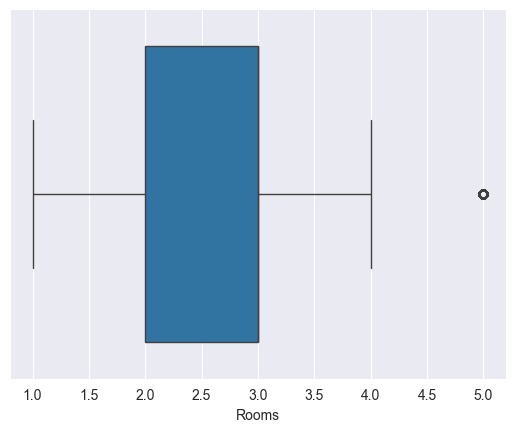

In [15]:
sns.boxplot(data=df, x="Rooms")
plt.show()

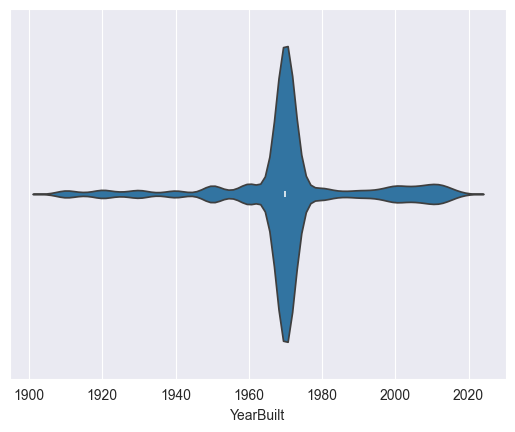

In [16]:
sns.violinplot(data=df, x="YearBuilt")
plt.show()

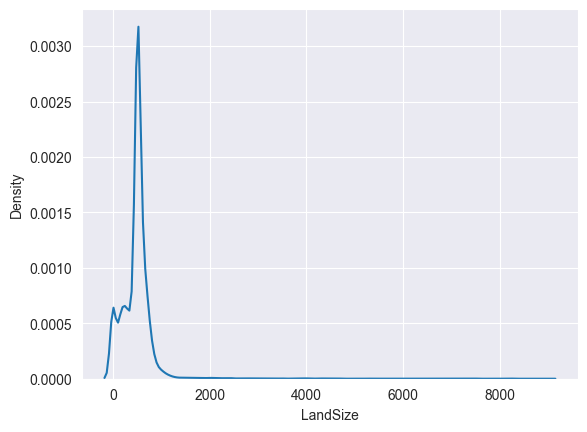

In [17]:
sns.kdeplot(data=df, x="LandSize")
plt.show()

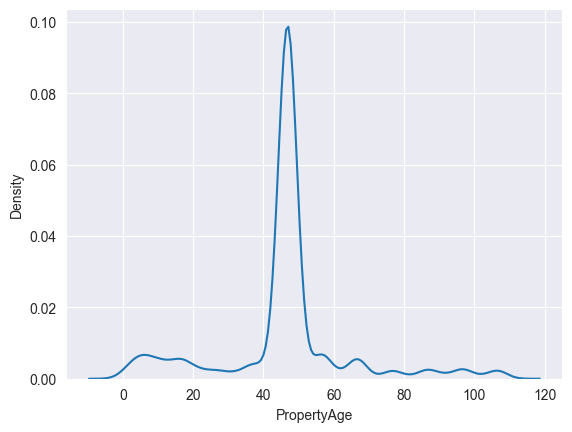

In [18]:
sns.kdeplot(data=df, x="PropertyAge")
plt.show()

<Axes: xlabel='AvgRoomSize', ylabel='BuildingArea'>

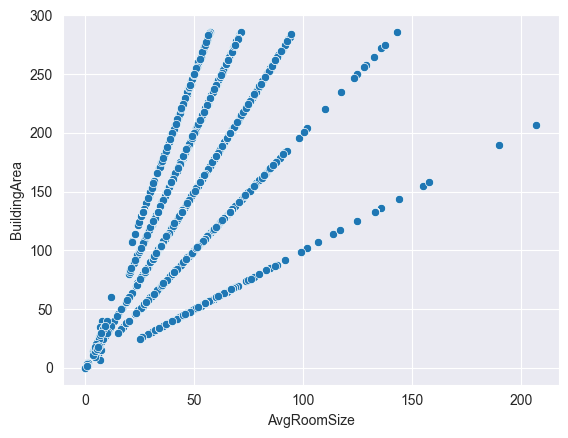

In [19]:
sns.scatterplot(data=df, x="AvgRoomSize", y="BuildingArea")

#### Categorical Features

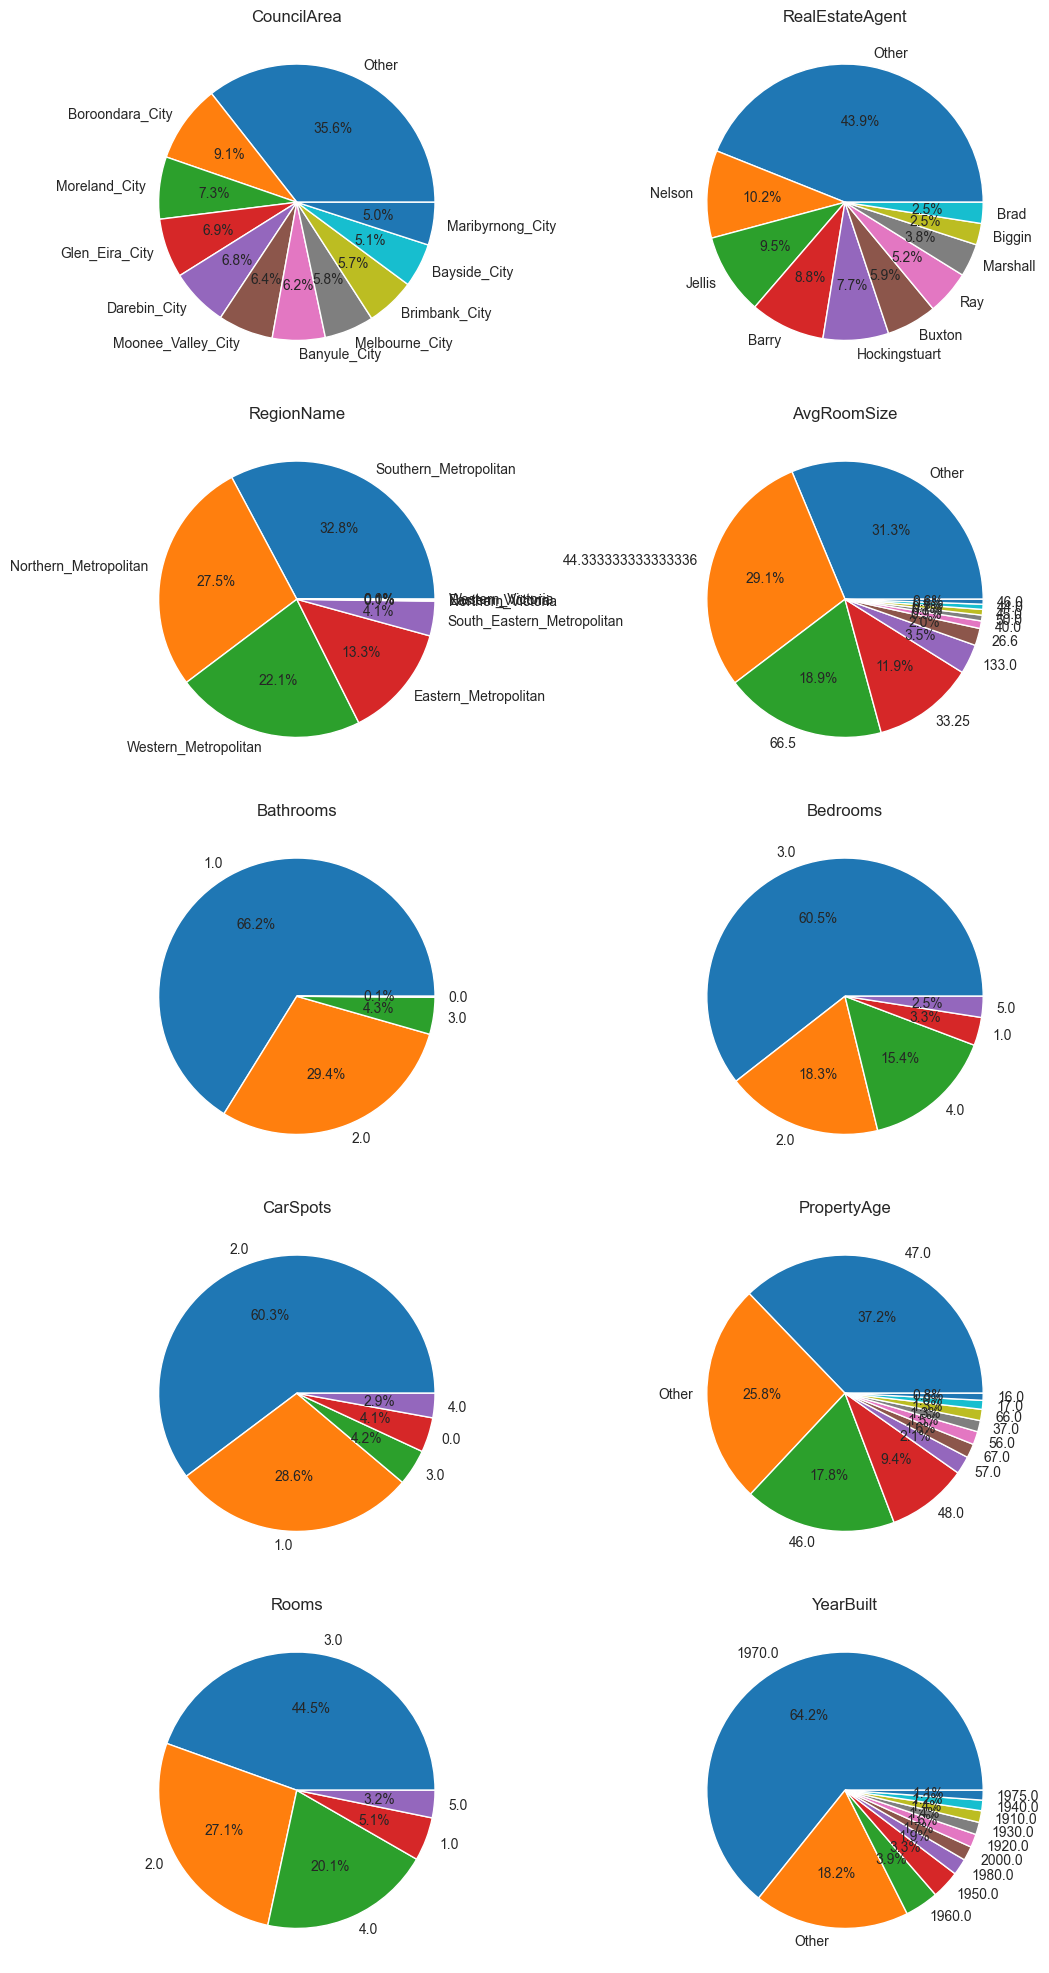

In [20]:
_, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.ravel()
for index, column in enumerate(["CouncilArea", "RealEstateAgent", "RegionName", "AvgRoomSize", "Bathrooms", "Bedrooms",
                                "CarSpots", "PropertyAge", "Rooms", "YearBuilt"]):
    eda.plot_pie_chart(df, column, show=False, ax=axes[index])
plt.tight_layout()
plt.show()

## Bivariate Analysis

In [21]:
df.columns

Index(['SaleDate', 'CouncilArea', 'RealEstateAgent', 'RegionName', 'Suburb',
       'AvgRoomSize', 'Bathrooms', 'Bedrooms', 'BuildingArea',
       'BuildingToLandRatio', 'CarSpots', 'DistanceToCBD', 'LandSize',
       'Latitude', 'Longitude', 'NeighbouringProperties', 'Postcode',
       'PropertyAge', 'Rooms', 'YearBuilt', 'Price'],
      dtype='object')

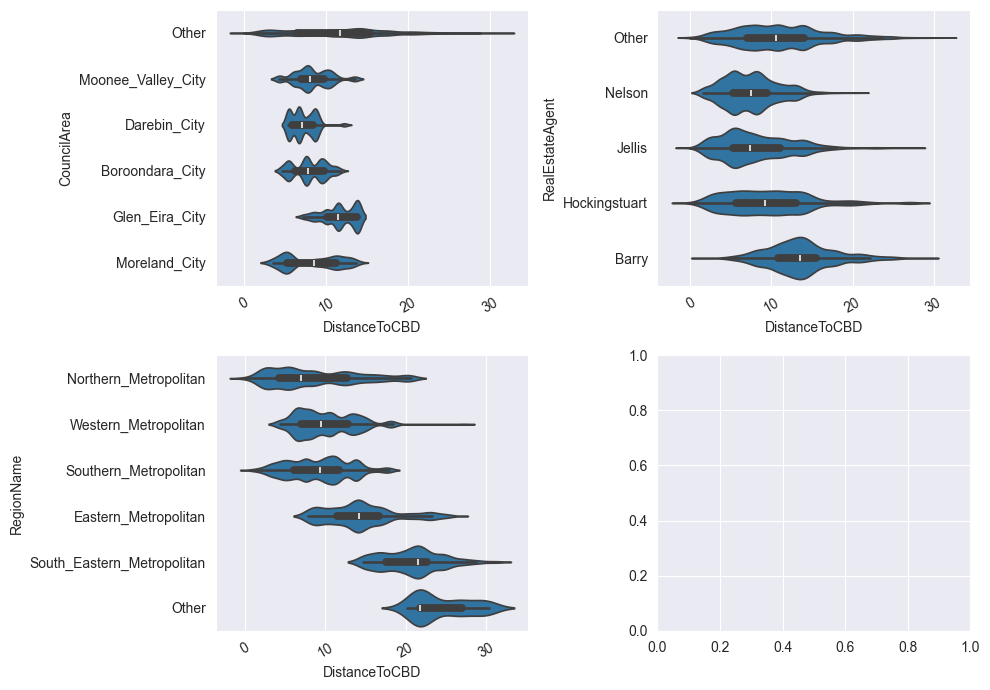

In [22]:
eda.plot_bivariates(df, "DistanceToCBD", sns.violinplot, "CouncilArea", "RealEstateAgent", "RegionName")

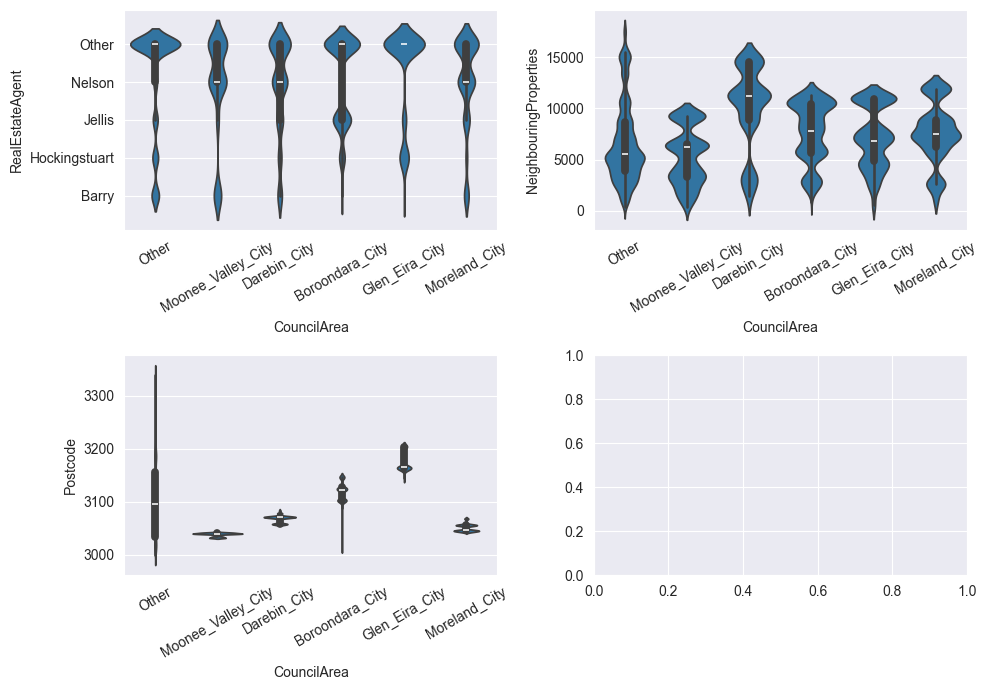

In [23]:
eda.plot_bivariates(df, "CouncilArea", sns.violinplot, "RealEstateAgent", "NeighbouringProperties", "Postcode")

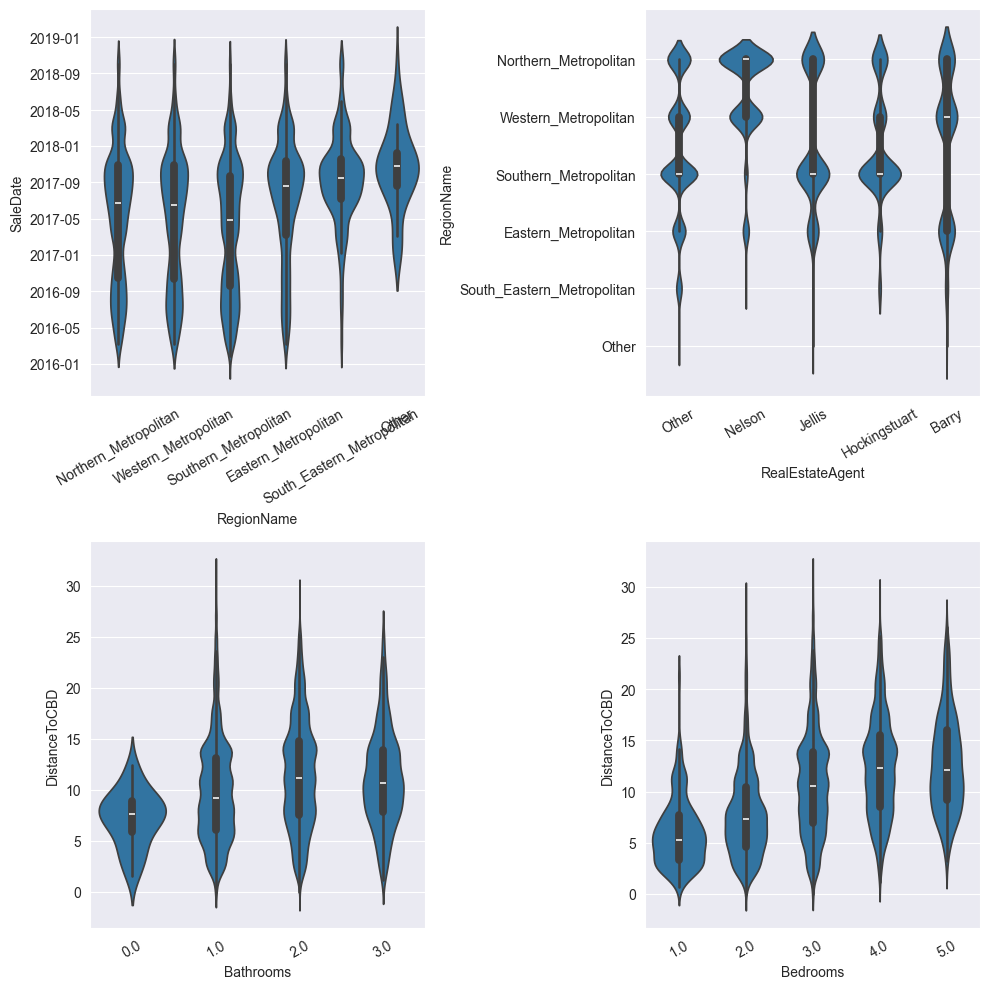

In [24]:
_, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
top_n_df = eda.top_n_filter(df, "RegionName", 5)
sns.violinplot(data=top_n_df, x="RegionName", y="SaleDate", ax=axes[0])
axes[0].tick_params(axis='x', rotation=30)
top_n_df = eda.top_n_filter(top_n_df, "RealEstateAgent", 5)
sns.violinplot(data=top_n_df, x="RealEstateAgent", y="RegionName", ax=axes[1])
axes[1].tick_params(axis='x', rotation=30)
sns.violinplot(data=df, x="Bathrooms", y="DistanceToCBD", ax=axes[2])
axes[2].tick_params(axis='x', rotation=30)
sns.violinplot(data=df, x="Bedrooms", y="DistanceToCBD", ax=axes[3])
axes[3].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

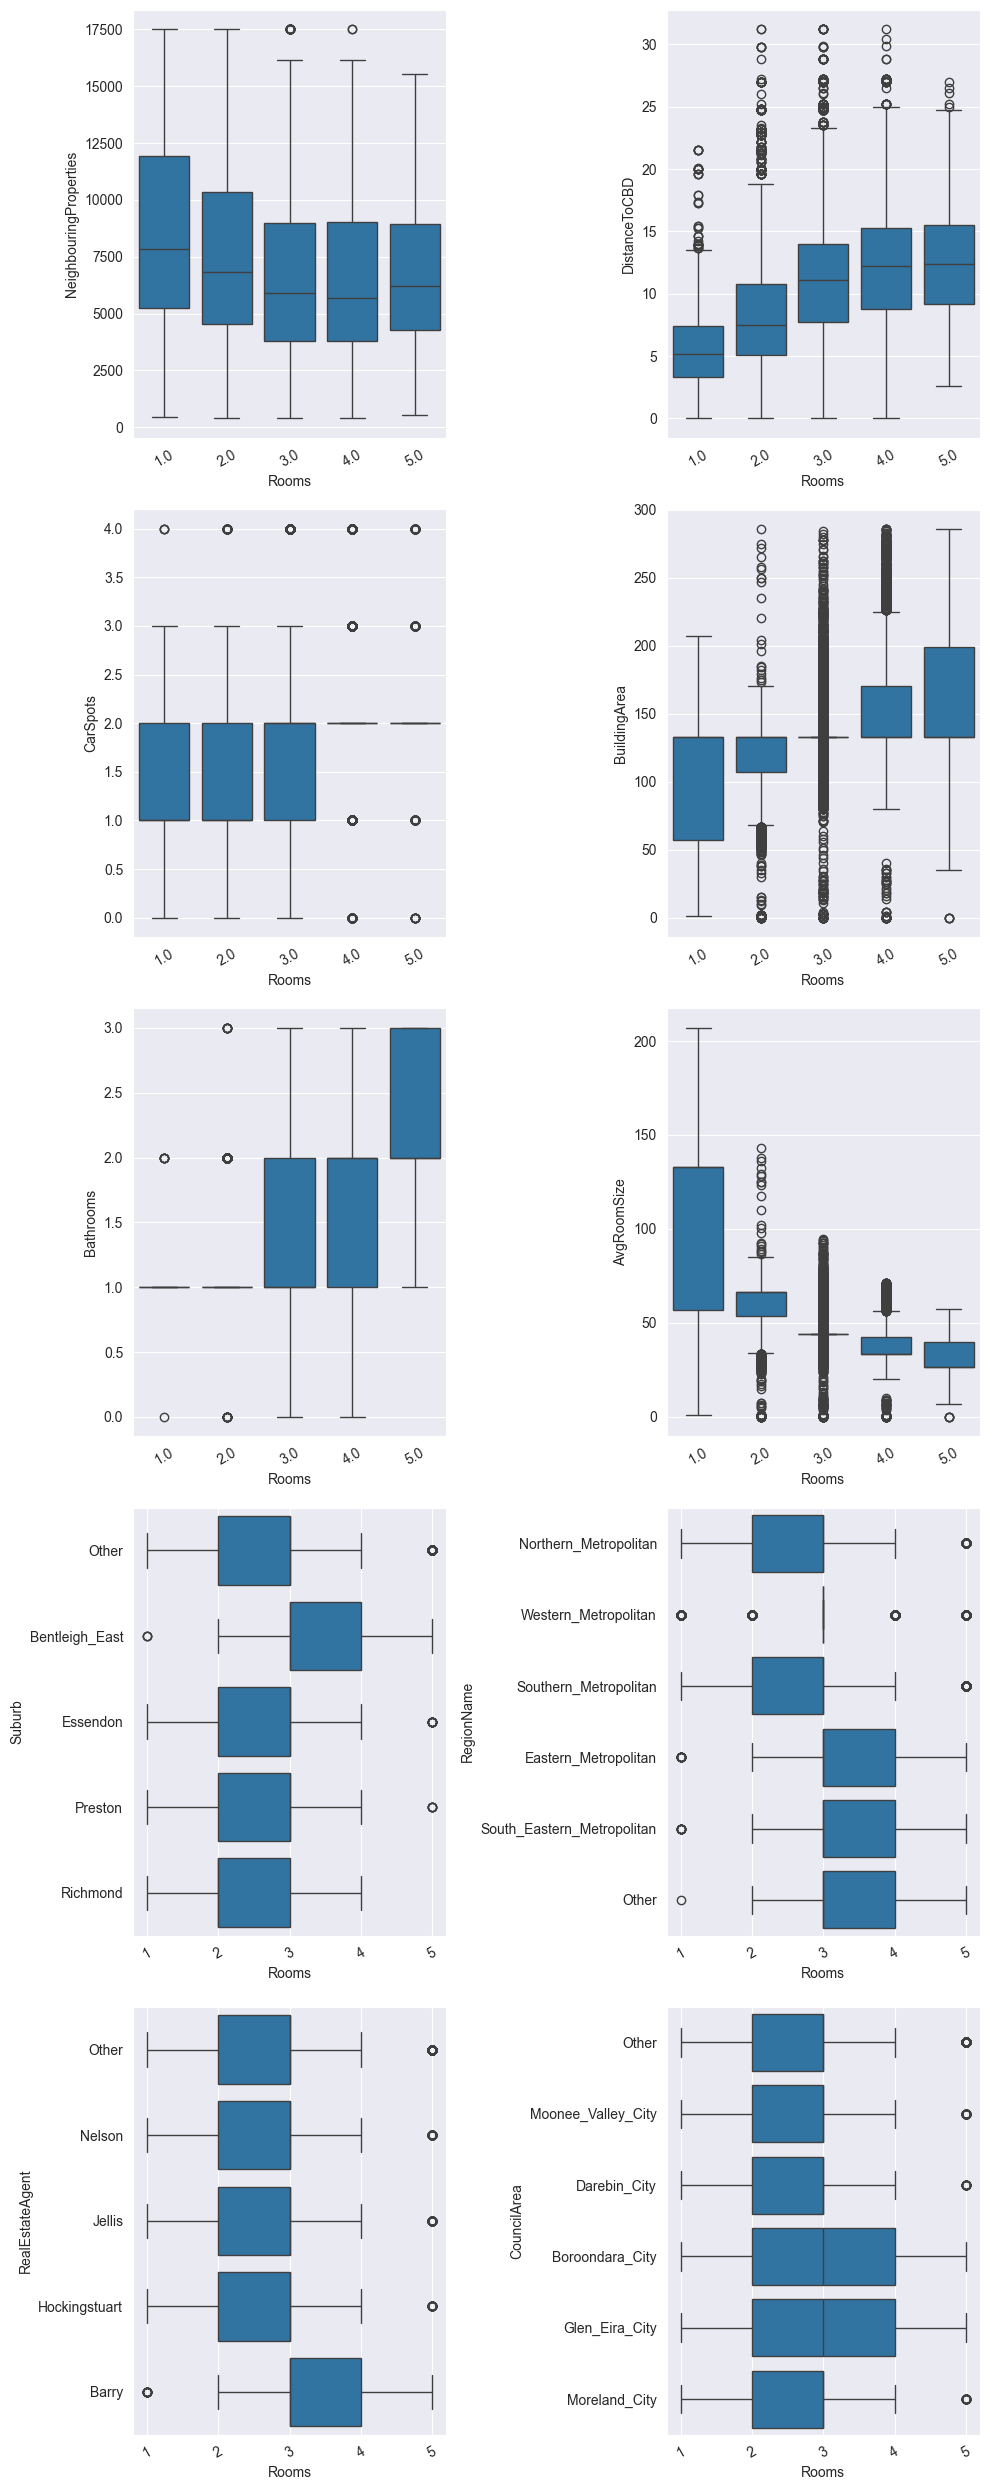

In [25]:
eda.plot_bivariates(df, "Rooms", sns.boxplot, "NeighbouringProperties", "DistanceToCBD", "CarSpots", "BuildingArea",
                    "Bathrooms", "AvgRoomSize", "Suburb", "RegionName", "RealEstateAgent", "CouncilArea")

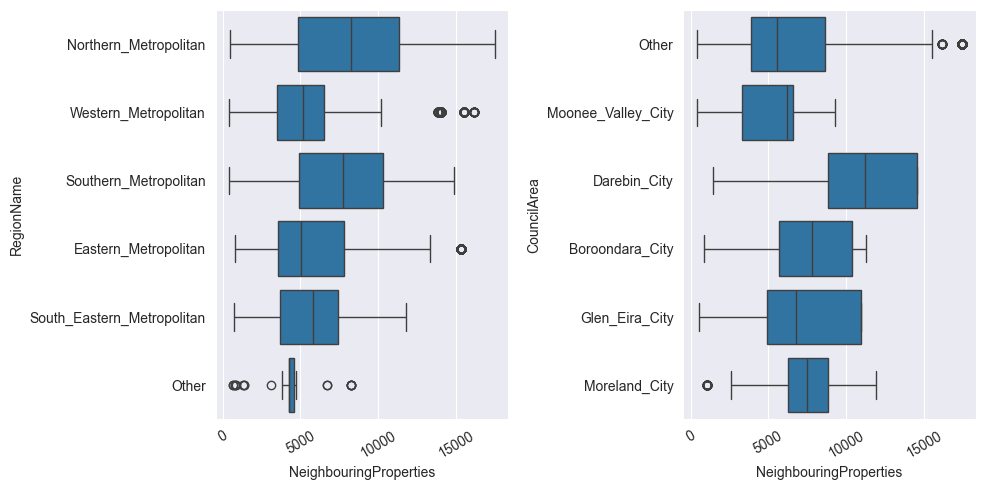

In [26]:
eda.plot_bivariates(df, "NeighbouringProperties", sns.boxplot, "RegionName", "CouncilArea")

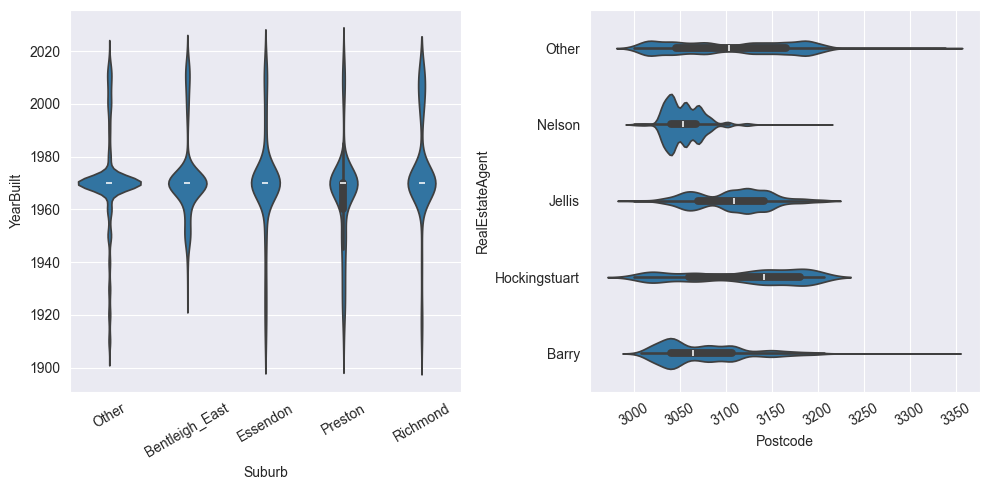

In [27]:
_, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.ravel()
top_n_df = eda.top_n_filter(top_n_df, "Suburb", 5)
sns.violinplot(data=top_n_df, x="Suburb", y="YearBuilt", ax=axes[0])
axes[0].tick_params(axis='x', rotation=30)
sns.violinplot(data=top_n_df, x="Postcode", y="RealEstateAgent", ax=axes[1])
axes[1].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

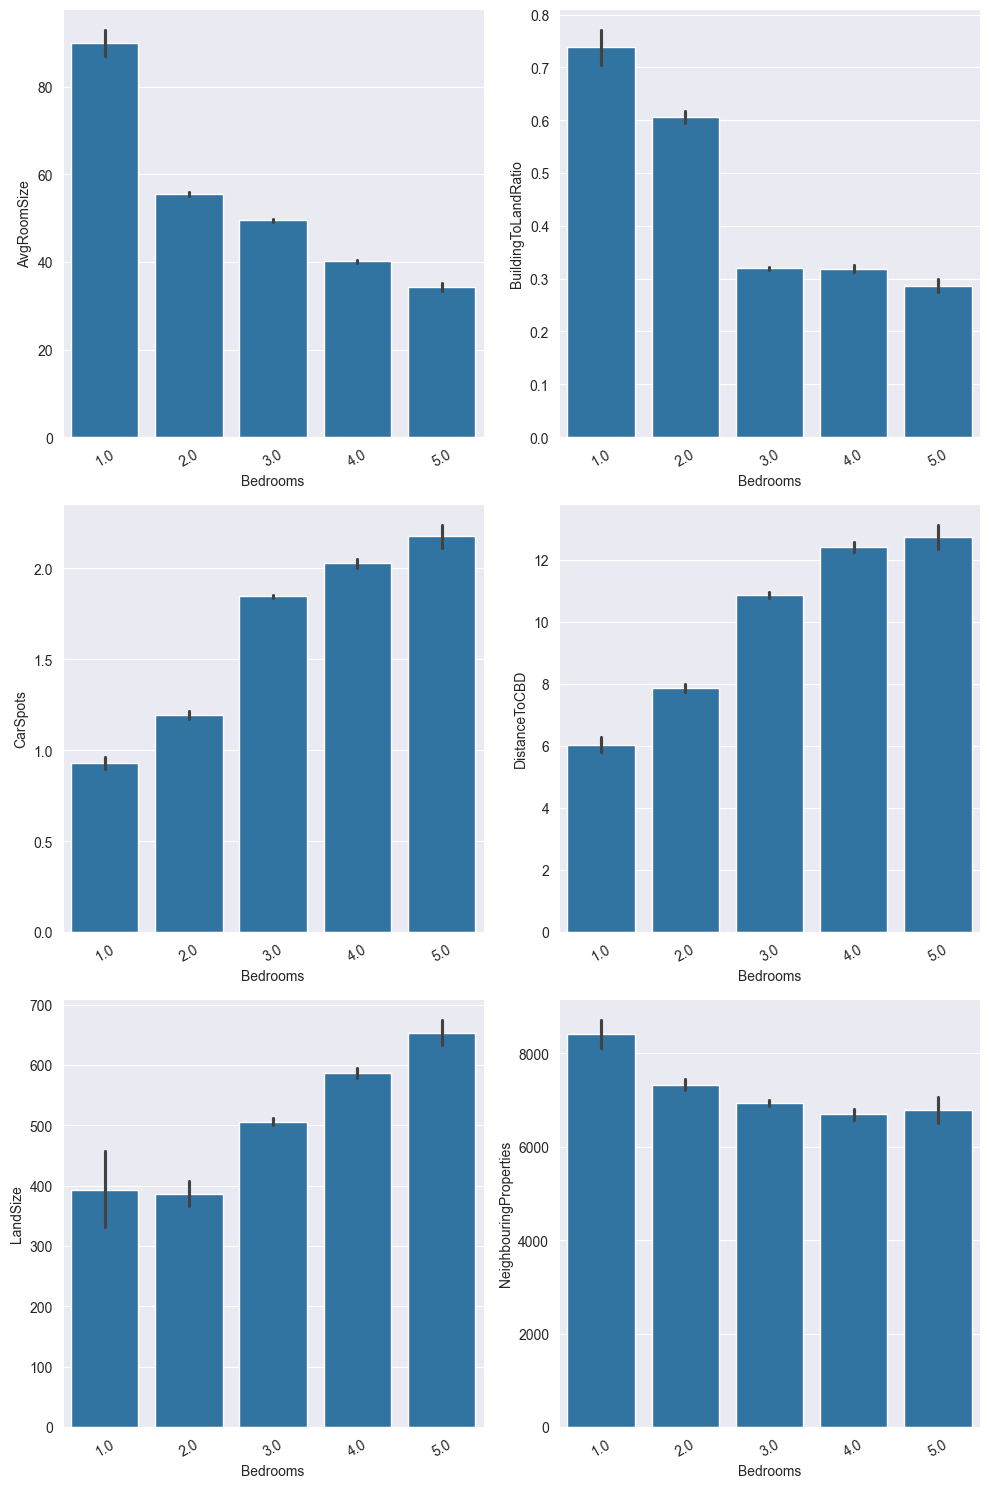

In [28]:
eda.plot_bivariates(df, "Bedrooms", sns.barplot, "AvgRoomSize", "BuildingToLandRatio", "CarSpots", "DistanceToCBD",
                    "LandSize", "NeighbouringProperties")

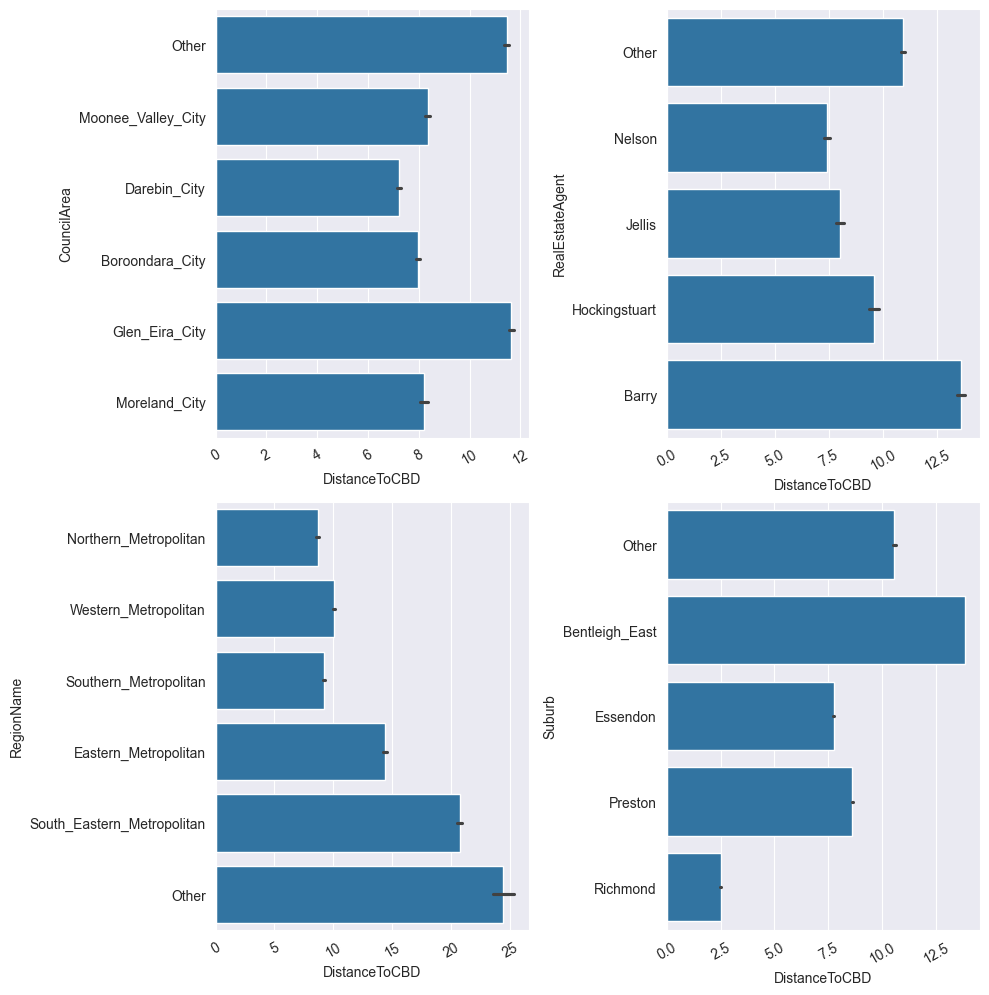

In [29]:
eda.plot_bivariates(df, "DistanceToCBD", sns.barplot, "CouncilArea", "RealEstateAgent", "RegionName", "Suburb")

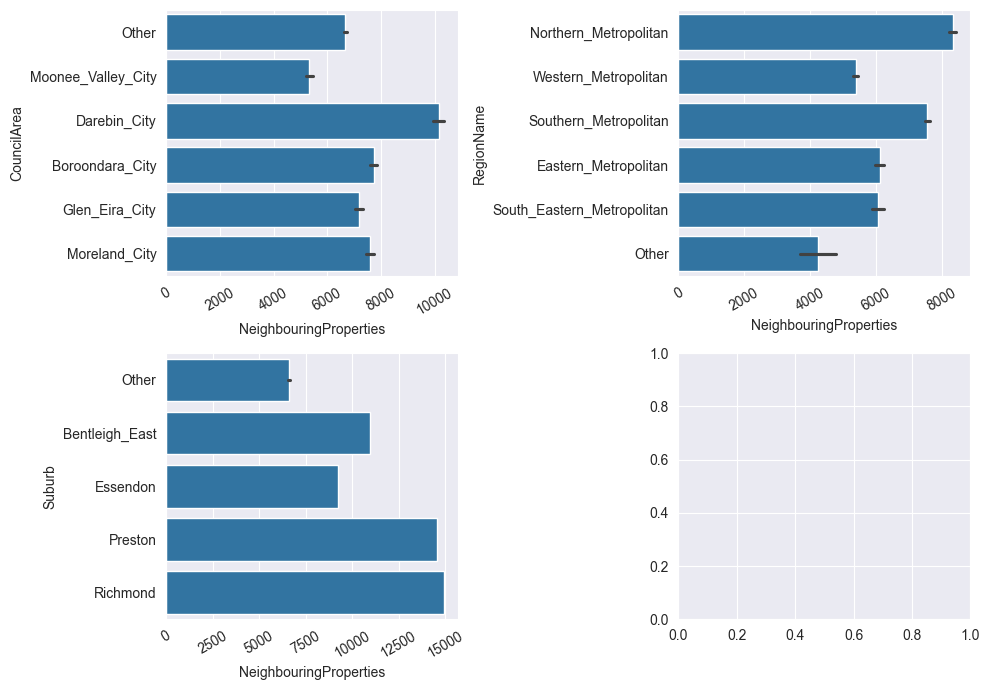

In [30]:
eda.plot_bivariates(df, "NeighbouringProperties", sns.barplot, "CouncilArea", "RegionName", "Suburb")

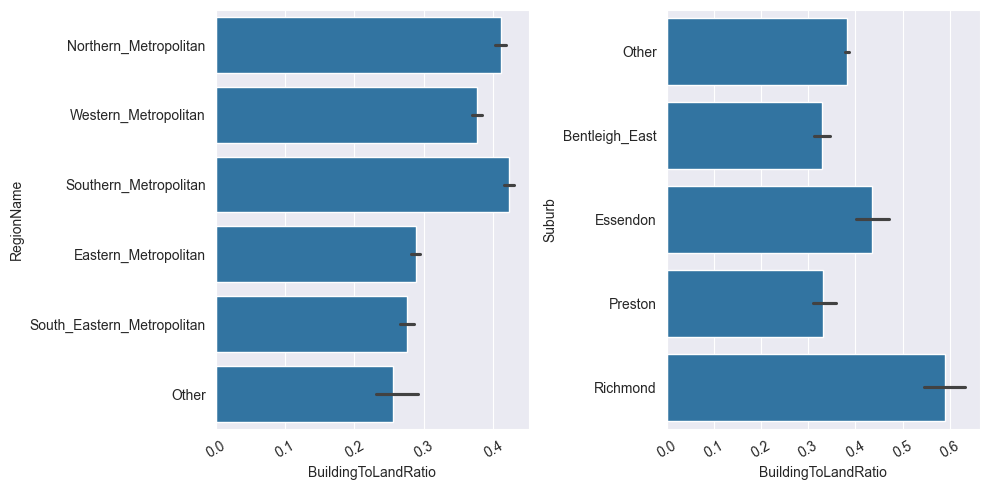

In [31]:
eda.plot_bivariates(df, "BuildingToLandRatio", sns.barplot, "RegionName", "Suburb")

<Axes: xlabel='CouncilArea', ylabel='PropertyAge'>

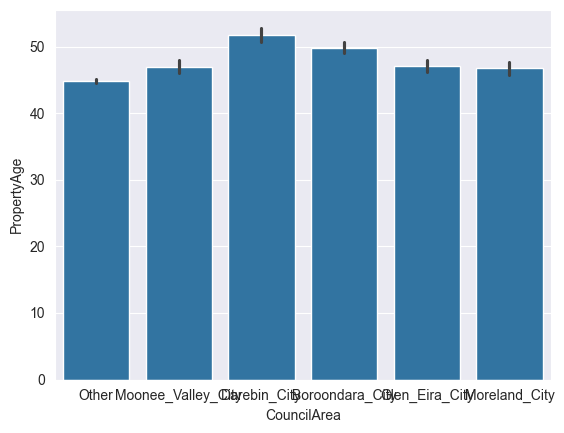

In [32]:
top_n_df = eda.top_n_filter(df, "CouncilArea", 5)
sns.barplot(data=top_n_df, x="CouncilArea", y="PropertyAge")

<Axes: xlabel='BuildingToLandRatio', ylabel='LandSize'>

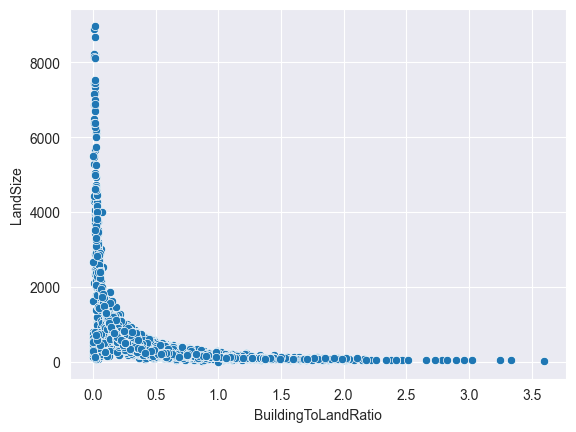

In [33]:
sns.scatterplot(data=top_n_df, x="BuildingToLandRatio", y="LandSize")

## Multivariate Analysis

<Axes: xlabel='Longitude', ylabel='Latitude'>

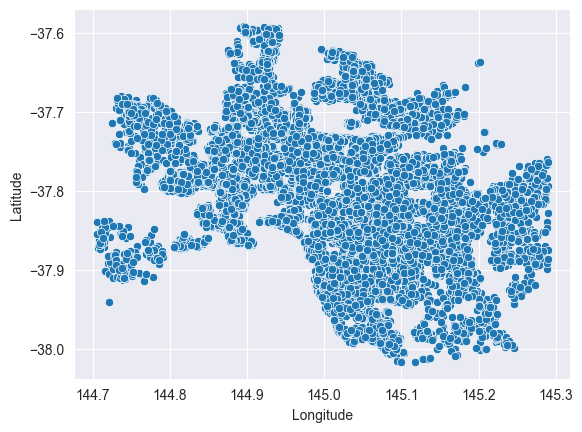

In [34]:
sns.scatterplot(data=df, x="Longitude", y="Latitude")

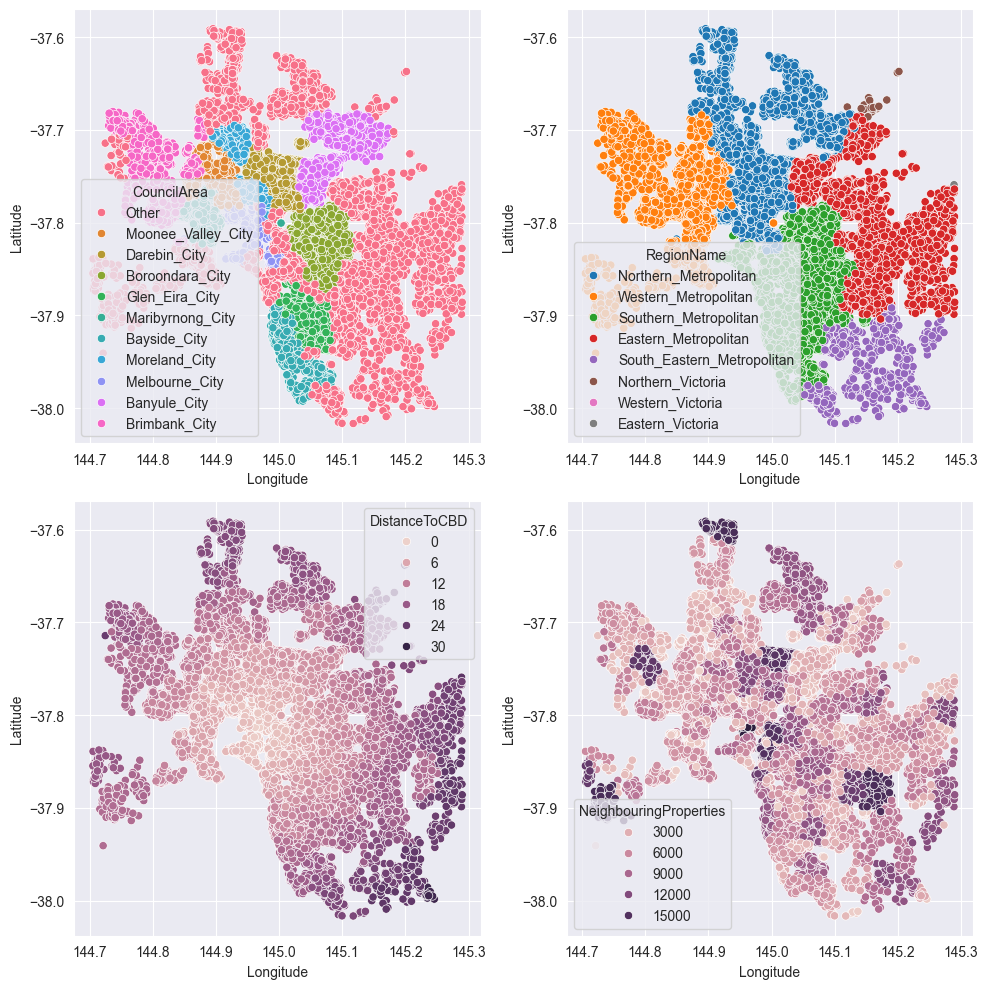

In [35]:
eda.scatter_with_hues(df, "Longitude", "Latitude", "CouncilArea", "RegionName", "DistanceToCBD",
                      "NeighbouringProperties")